# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
* Alumno 1: Benali, Abdelilah
* Alumno 2: Cuesta Cifuentes, Jair
* Alumno 3: González Huete, Manel
* Alumno 4: Manzanas Mogrovejo, Francisco
* Alumno 5: Pascual, Guadalupe

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.




---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Preparar Colab

<font color='red'>**IMPORTANTE:**</font><br>
El entorno de Colab está preinstalado con una serie de librerías por defecto. Para trabajar en base a las especificaciones del ejercicio se necesitan intalar unas librerías que bajen de versión las existentes en Colab. Entre ellas tensorflow. El problema de realizar esta acción es que para que todas las versiones sean consideradas por el entorno hay que reiniciar la sesión, sino se mantienen dependencias y los import no funcionan. <br>
Es decir tras los "pip install" hay que hacer un **"Runtime > Restart runtime"** o si tienes Colab en español: "Entorno de Ejecución/Reiniciar sesion".<br>
En este punto se ha de tener presente que se ha reiniciado y **se han perdido las variables** que se hayan establecido, por ese motivo repetiremos el código para identificar si estamos en Colab.

In [1]:
# Verificamos si estamos en Colab
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

#### 1.2.1. Instalar librerías necesarias

<font color='red'>**IMPORTANTE:**</font><br>
Ignorar los errores que puedan aparecer, son incompatibilidades con librerías avanzadas que no utilizamos ni necesitamos para nuestro código.

In [2]:
import sys
import os
#Si ya tenemos lasa librerías cargadas desde requirements.txt --> false
INSTALL_LOCAL = False
#Si quremos trabajar con el entorno nativo --> false
IN_COLAB_ENV = False

if IN_COLAB:  
# =========================
#  Entorno Colab nativo con todo lo compatible.
#  Sólo recordar que se debe REINICIAR EL RUNTIME (al acabar)
# =========================  
  print(" [INFO] - Instalando paquetes adicionales...")  
  print("="*60)
  print("IMPORTANTE: Ignorar los errores que aparecen:")
  print("   Son incompatibilidades que aparecen con librería avanzadas")
  print("   que no necesitamos ni vamos a utilizar")  
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git@1.2.2
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.1 --quiet
  print("\n" + "="*60)
  print("INSTALACIÓN COMPLETADA")
  print("="*60)
  print("IMPORTANTE: Debes REINICIAR EL RUNTIME ahora:")
  print("1. Ve a Runtime > Restart runtime")
  print("2. Después ejecuta las importaciones")
  print("="*60)  
  INSTALL_LOCAL = False
  IN_COLAB_ENV = False

if IN_COLAB_ENV:
# =========================
#  Colab con env --> 
#    no funciona muy bien pues aunque se cree el entorno, Colab sigue
#    utilizando el suyo con sus librería y se necesita usar %%writefile
# =========================      
  # 1. Instalar virtualenv
  !pip install virtualenv --quiet

  # 3. Crear el entorno virtual llamado "miar_rl"
  !virtualenv miar_rl

  # 4. Instala paquetes DENTRO del entorno virtual con versiones exactas
  !./miar_rl/bin/pip install numpy==1.23.5 --quiet
  !./miar_rl/bin/pip install gym==0.17.3 --quiet
  !./miar_rl/bin/pip install tensorflow==2.12.1 keras==2.12.0 --quiet
  !./miar_rl/bin/pip install git+https://github.com/Kojoley/atari-py.git@1.2.2 --quiet
  !./miar_rl/bin/pip install keras-rl2==1.0.5 --quiet

  # 5. Librerías adicionales
  !./miar_rl/bin/pip install Pillow
  !./miar_rl/bin/pip install matplotlib
  !./miar_rl/bin/pip install tqdm
  INSTALL_LOCAL = False
    
if INSTALL_LOCAL:    
# =========================
#  Librería para trabajar en local, si NO se cargaron las 
#    librerías desde fichero requirements
# =========================        
  %pip install numpy==1.23.5
  %pip install gym==0.17
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.4.3
  %pip install tqdm
  %pip install imageio==2.15.0

---
### 1.3. Localizar entorno de trabajo: Google colab o local

**IMPORTANTE:**<br>
Recordar que antes de seguir (si hemos decidido el entorno de Colab nativo - IN_COLAB=True -) 
* Hay que hacer un <font color='red'>"Runtime > Restart runtime"</font> o si tienes Colab en español: "Entorno de Ejecución/Reiniciar sesion".

In [3]:
#Si ya tenemos lasa librerías cargadas desde requirements.txt --> false
INSTALL_LOCAL = False
#Si quremos trabajar con el entorno nativo --> false
IN_COLAB_ENV = False

# Verificamos si estamos en Colab
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

In [4]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.4. Montar carpeta de datos local (solo Colab)

In [5]:
# Cambiar al directorio en Google Drive que deseas usar
import os
if IN_COLAB:
  print(" [INFO] - Estamos ejecutando en Colab")

  if IN_COLAB:
    # Montar Google Drive en el punto de montaje
    print(" [INFO] - Colab: montando Google drive en: ", mount)

    drive.mount(mount)

    # Crear drive_root si no existe
    create_drive_root = True
    if create_drive_root:
      print("\n [INFO] - Colab: Asegurando que ", drive_root, " existe.")
      os.makedirs(drive_root, exist_ok=True)

    # Cambiar al directorio
    print("\n [INFO] - Colab: Cambiamos el directorio a: ", drive_root)
    %cd $drive_root
# Verificar que estamos en el directorio de trabajo correcto
%pwd
print(" [INFO] - Archivos en el directorio: ")
print(os.listdir())

 [INFO] - Archivos en el directorio: 
['.anaconda', '.cache', '.conda', '.condarc', '.config', '.continuum', '.dia', '.git', '.gitconfig', '.gitignore', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.Ld9VirtualBox', '.lesshst', '.matplotlib', '.viminfo', '.virtual_documents', '.vscode', '01MAIR_ACT_Video.ipynb', '01MIAR_00_Intro.ipynb', '01MIAR_01_Python101.ipynb', '01MIAR_02_Python101_DataTypes.ipynb', '01MIAR_03_Python101_Control.ipynb', '01MIAR_04_Python101_Functions.ipynb', '01MIAR_05_Python101_Files.ipynb', '01MIAR_06_Python101_OOP.ipynb', '01MIAR_07_Python101_Advanced.ipynb', '01MIAR_08_NumPy.ipynb', '01MIAR_09_Pandas.ipynb', '01MIAR_10_+Pandas.ipynb', '01MIAR_11_Visualization.ipynb', '01MIAR_12_Data_Processing.ipynb', '01MIAR_13_Generators.ipynb', '01MIAR_14_Natural_Language.ipynb', '01MIAR_15_OCR.ipynb', '01MIAR_16_Image_Analysis.ipynb', '01MIAR_ACT_Actividad_Final.ipynb', '01MIAR_ACT_Final.ipynb', '01MIAR_ACT_Group.ipynb', '01MIAR_ACT_Group_Solved.ipynb', '01MIAR_AC

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [6]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc       # Para garbage collection
import random
import os
import pickle
import re       # Para expresiones regulares en carga de checkpoints
import gym      # Para el entorno de Atari
import cv2     # Para preprocesamiento de imágenes si se usa AtariProcessor
import warnings
import time
import psutil
import tracemalloc
import json
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent, AbstractDQNAgent
import datetime

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.layers import Lambda, Add
from tensorflow.keras.models import Model
if IN_COLAB:  
  from tensorflow.keras.optimizers.legacy import Adam
else:
  from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
from collections import deque
from tqdm import trange     # Necesaria para la barra de progreso en simple_train
import tensorflow.keras.backend as K

In [7]:
# Necesario para la grabación de video
try:
    import gym.wrappers
except ImportError:
    print(" [WARNING] - gym.wrappers no está disponible. La grabación de video no funcionará.")
    gym.wrappers = None # Asegurar que no dé error si no se encuentra


In [8]:
# Configurar TensorFlow para CPU (x cores)
def optimizar_tensorflow():
    """Configura TensorFlow para rendimiento óptimo en CPU/GPU"""
    # Limpiar sesión previa
    gc.collect()

    # Optimización de GPU si está disponible
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f" [INFO] - GPU optimizada para crecimiento adaptativo de memoria")
        except Exception as e:
            print(f" [INFO] - Error al configurar GPU: {e}")

    # Optimización de CPU
    num_cpu_cores = os.cpu_count() or 8  # Fallback a 8 si no se puede detectar

    os.environ["OMP_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["OPENBLAS_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["MKL_NUM_THREADS"] = str(num_cpu_cores // 2)

    tf.config.threading.set_intra_op_parallelism_threads(num_cpu_cores // 2)
    tf.config.threading.set_inter_op_parallelism_threads(max(2, num_cpu_cores // 4))

    # Modo eager solo si es necesario
    # Para entrenamiento, es mejor desactivarlo por rendimiento
    tf.config.run_functions_eagerly(False)

    print(f" [INFO] - TensorFlow optimizado para {num_cpu_cores} cores CPU")
    return True

#### Crear el entorno
Nuestro entorno es el juego Space Invaders, de Atari

In [9]:
# Crear el entorno
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

D:\90-Tools\anaconda3\envs\mghMiar08\lib\site-packages\gym\logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


EJEMPLO TONTO DE VIDEO... PERO SIRVE PARA LUEGO...

In [10]:
# SOLUCIÓN MÁS SIMPLE Y CONFIABLE
import gym
import imageio
import os

# Crear directorio
video_dir = 'checkpoints/videos'
os.makedirs(video_dir, exist_ok=True)

# Crear entorno
env = gym.make('SpaceInvaders-v0')

# Lista para almacenar frames
frames = []

# Ejecutar episodio y capturar frames
observation = env.reset()
total_reward = 0

print("Capturando frames...")
for step in range(100000):
    # Renderizar y capturar frame
    frame = env.render(mode='rgb_array')
    if frame is not None:
        frames.append(frame)
    
    # Acción aleatoria
    action = env.action_space.sample()
    
    # Ejecutar paso
    step_result = env.step(action)
    
    if len(step_result) == 5:
        observation, reward, done, truncated, info = step_result
        done = done or truncated
    else:
        observation, reward, done, info = step_result
    
    total_reward += reward
    
    if done:
        print(f" [INFO] - Episodio terminado en el paso {step}")
        break

env.close()

# Guardar video
if frames:
    video_path = os.path.join(video_dir, 'spaceinvaders_game.mp4')
    print(f" [INFO] - Guardando {len(frames)} frames en video...")
    imageio.mimsave(video_path, frames, fps=30)
    print(f"✓ Video guardado: {video_path}")
    print(f"✓ Tamaño del archivo: {os.path.getsize(video_path)} bytes")
else:
    print("❌ [ERROR] - No se capturaron frames")

print(f"\n [INFO] - Recompensa total: {total_reward}")

Capturando frames...
 [INFO] - Episodio terminado en el paso 303
 [INFO] - Guardando 304 frames en video...


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (160, 210) to (160, 224) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


✓ Video guardado: checkpoints/videos\spaceinvaders_game.mp4
✓ Tamaño del archivo: 69568 bytes

 [INFO] - Recompensa total: 55.0


In [11]:
print("El tamaño de nuestro 'frame' es: ", env.observation_space)
print("El número de acciones posibles es : ", nb_actions)
print("Las acciones posibles son : ",env.env.get_action_meanings())

# Here we create an hot encoded version of our actions
# possible_actions = [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]...]
possible_actions = np.array(np.identity(env.action_space.n,dtype=int).tolist())
print("\nOHE de las acciones posibles: \n", possible_actions)

El tamaño de nuestro 'frame' es:  Box(0, 255, (210, 160, 3), uint8)
El número de acciones posibles es :  6
Las acciones posibles son :  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

OHE de las acciones posibles: 
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


#### Definición Hiperparámetros

In [12]:
### HIPERPARÁMETROS DEL MODELO
# Hiperparámetros optimizados
HEIGHT = 84
WIDTH = 84
CHANNELS = 1                    # Canal para grises
USE_FRAMESTACK = True           # Cambiar a True si quieres detección de movimiento
WINDOW_LENGTH = 4 if USE_FRAMESTACK else 1   # Número de fotogramas apilados          # La mayoría de implementaciones usan 4 frames
batch_size = 32                 # Tamaño de batch óptimo
gamma = 0.99                    # Factor de descuento (mejor que 0.95 para recompensas a largo plazo)
learning_rate = 0.00025         # Tasa de aprendizaje estándar para DQN
memory_size = 1000000           # Buffer de memoria grande para mejor estabilidad
TARGET_UPDATE_INTERVAL = 10000  # Actualización de red objetivo cada 10,000 pasos
WARMUP_STEPS = 50000            # Pasos iniciales para llenar la memoria (experiencia aleatoria)
NUM_TRAINING_STEPS = 2000000    # Total de pasos de entrenamiento (5M para buenos resultados) = num_steps
EPSILON_STEPS = 500000          # Total de pasos de evaluación del modelo
INPUT_SHAPE = (HEIGHT, WIDTH)   # Dimensiones de cada frame

# Single frame shape (height, width, channels)
FRAME_SHAPE = (HEIGHT, WIDTH, CHANNELS)  # (84, 84, 1)
MODEL_INPUT_SHAPE = (HEIGHT, WIDTH, WINDOW_LENGTH)  # Forma para el modelo (channels_last)
SEQ_INPUT_SHAPE = (WINDOW_LENGTH,HEIGHT, WIDTH)  # Forma para el modelo (channels_last)

### HIPERPARÁMETROS DE PREPROCESAMIENTO
# Definir shape consistente
if USE_FRAMESTACK:
    state_shape = (84, 84, WINDOW_LENGTH)  # (84, 84, x)
else:
    state_shape = (84, 84, 1)  # (84, 84, 1) - escala de grises simple

state_size = (*INPUT_SHAPE, WINDOW_LENGTH)   # Nuestra entrada es una pila de 4 fotogramas, por lo tanto 110x84x4 (ancho, alto, canales)
input_shape = (*INPUT_SHAPE, WINDOW_LENGTH)  # Para la API de keras-rl
action_size = env.action_space.n       # 6 acciones posibles
learning_rate =  0.00025               # Alfa (también conocido como tasa de aprendizaje)

### HIPERPARÁMETROS DE ENTRENAMIENTO
# total_episodios = 10    #TEST      # Episodios totales para el entrenamiento
# max_steps = 10000       #TEST      # Máximo de pasos posibles por episodio
NUM_TRAINING_STEPS = 10000    # Total de pasos de entrenamiento (5M para buenos resultados) = num_steps
total_episodios = 5                # Episodios totales para el entrenamiento
max_steps       = 3000               # Máximo de pasos posibles por episodio

# Parámetros de exploración para la estrategia epsilon-greedy
epsilon_start = 1.0            # Probabilidad de exploración al inicio
epsilon_stop = 0.1             # Probabilidad mínima de exploración

# Hiperparámetros del aprendizaje Q
tau = 0.001
checkpoint_path="checkpoints"
TARGET_REWARD = 20.0

### HIPERPARÁMETROS DE MEMORIA
pretrain_length = batch_size   # Número de experiencias almacenadas en la memoria al inicializar por primera vez

## CAMBIA ESTO A TRUE SI QUIERES RENDERIZAR EL ENTORNO
episode_render = False

#### Clase "processor" para Atari

Ahora definimos un "processor" para las pantallas de entrada del juego, en el que recortamos el tamaño de la imagen (matriz de 210 x 160 píxeles) y la convertimos En una matriz bidimensional de 80 x 80 píxeles). También convertimos las imágenes de RGB a escala de grises normal, ya que no necesitamos usar los colores. Con este trabajo buscamos acelerar nuestro algoritmo, eliminando la información innecesaria y reduciendo la carga de la GPU.

In [13]:
class AtariProcessor(Processor):
    """
    Procesador para preprocesar observaciones del entorno Atari (e.g., SpaceInvaders-v0).

    Hereda de rl.core.Processor y proporciona métodos para convertir observaciones RGB en
    imágenes en escala de grises, redimensionarlas y normalizarlas, así como para limitar
    las recompensas.

    MÉTODOS:
    --------
        process_observation(observation): Convierte una observación RGB a escala de grises
                                         y la redimensiona.
        process_state_batch(batch): Normaliza un lote de estados dividiendo por 255.
        process_reward(reward): Limita las recompensas a un rango [-1, 1].
    """
    def __init__(self, input_shape=(INPUT_SHAPE)):
        self.input_shape = input_shape
        # Precargar una imagen negra para inicialización
        self.black_frame = np.zeros(input_shape, dtype=np.uint8)

    def process_observation(self, observation):
        """
        Preprocesa una observación convirtiéndola a escala de grises y redimensionándola.

        Parámetros:
        -----------
            observation (np.ndarray): Observación cruda del entorno con forma (height, width, channels).

        Retorna:
        --------
            np.ndarray: Imagen en escala de grises redimensionada a INPUT_SHAPE (84, 84) en formato uint8.

        Raises:
            AssertionError: Si la observación no tiene 3 dimensiones o la forma procesada no coincide con INPUT_SHAPE.
        """
        # Si la observación es None, devolver un marco negro
        if observation is None:
            return self.black_frame

        assert observation.ndim == 3  # (height, width, channel)
        # Crop the screen (remove the part below the player)
        # [Up: Down, Left: right]
        cropped_img = observation[18:-12, 4:-12]
        # Optimización: usar cv2 para redimensionar y convertir a escala de grises (más rápido que PIL)
        resized = cv2.resize(cropped_img, self.input_shape)
        processed_observation = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY) if len(resized.shape) == 3 else resized
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype(np.uint8)

    def process_state_batch(self, batch):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        """
        Normaliza la recompensa al rango [-1, 1].

        Parámetros:
        -----------
            reward (float): Recompensa original del entorno.

        Retorna:
        --------
            float: Recompensa limitada al rango [-1, 1].
        """
        return np.clip(reward, -1., 1.)

    def process_step(self, observation, reward, done, info):
        """
        Procesa un paso completo del entorno.
        
        Parámetros:
        -----------
            observation: Observación del entorno.
            reward: Recompensa obtenida.
            done: Indicador de fin de episodio.
            info: Información adicional del entorno.
            
        Retorna:
        --------
            tuple: (observación procesada, recompensa procesada, done, info)
        """
        processed_observation = self.process_observation(observation)
        processed_reward = self.process_reward(reward)
        return processed_observation, processed_reward, done, info

#### Revisar el entorno de juego

In [14]:
print(" [INFO] - Numero de acciones disponibles: " + str(nb_actions))

 [INFO] - Numero de acciones disponibles: 6


In [15]:
print(" [INFO] - Formato de las observaciones:")
env.observation_space

 [INFO] - Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

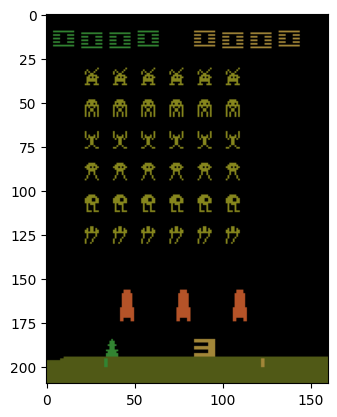

In [16]:
observation = env.reset()
for i in range(22):
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, reward, done, info = env.step(1)

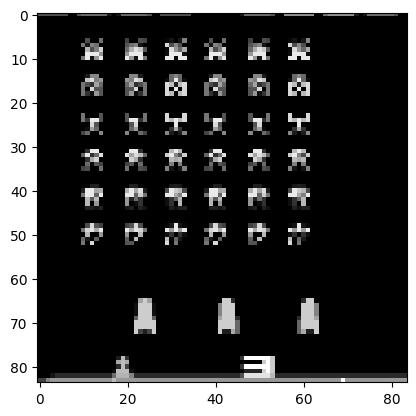

(210, 160, 3)
(84, 84)


In [17]:
# Mostrar las entradas preprocesadas en escala de grises y comparar originales y preprocesados.
processor = AtariProcessor()
obs_preprocessed = processor.process_observation(observation).reshape(INPUT_SHAPE)
# Seleccionamos el primer frame y lo normalizamos
frame = processor.process_state_batch(obs_preprocessed)
# Visualizar en escala de grises
plt.imshow(frame, cmap='gray')
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

#### Clase ReplayMemory

In [18]:
class ReplayMemory:
    """ReplayMemory optimizada para evitar fugas de memoria"""

    def __init__(self, capacity, state_shape):
        self.capacity = capacity
        self.position = 0
        self.size = 0

        # Pre-asignar arrays con el tamaño exacto
        # Usar uint8 para estados (más eficiente que float32)
        self.states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.actions = np.zeros(capacity, dtype=np.int32)
        self.rewards = np.zeros(capacity, dtype=np.float32)
        self.next_states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.dones = np.zeros(capacity, dtype=np.bool_)

        print(f" [INFO] - ReplayMemory creada: {capacity} samples, {state_shape} shape")
        memory_size = (
            self.states.nbytes + self.next_states.nbytes +
            self.actions.nbytes + self.rewards.nbytes + self.dones.nbytes
        ) / (1024 * 1024)
        print(f" [INFO] - Memoria asignada: {memory_size:.2f} MB")

    def append(self, state, action, reward, next_state, done):
        """Añade una experiencia al buffer de forma eficiente"""
        # Convertir a uint8 para ahorrar memoria (estados son imágenes 0-255)
        if state.dtype != np.uint8:
            state = (state * 255).astype(np.uint8)
        if next_state.dtype != np.uint8:
            next_state = (next_state * 255).astype(np.uint8)

        # Almacenar directamente en el array pre-asignado
        self.states[self.position] = state
        self.actions[self.position] = action
        self.rewards[self.position] = reward
        self.next_states[self.position] = next_state
        self.dones[self.position] = done

        # Actualizar posición circular
        self.position = (self.position + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)

    def sample(self, batch_size):
        """Muestra un batch de experiencias de forma eficiente"""
        if self.size < batch_size:
            raise ValueError(f"No hay suficientes samples ({self.size}) para batch_size ({batch_size})")

        # Generar índices aleatorios
        indices = np.random.choice(self.size, batch_size, replace=False)

        # Extraer batch y convertir de vuelta a float32 para el entrenamiento
        batch_states = self.states[indices].astype(np.float32) / 255.0
        batch_actions = self.actions[indices]
        batch_rewards = self.rewards[indices]
        batch_next_states = self.next_states[indices].astype(np.float32) / 255.0
        batch_dones = self.dones[indices]

        return batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones

    def __len__(self):
        return self.size

    def clear(self):
        """Limpia la memoria de forma segura"""
        self.position = 0
        self.size = 0
        # No es necesario limpiar los arrays, se sobrescriben

#### Clase PerformanceMonitor

Actualmente no se usa, si se necesitase mayor detalle de la evolución de los entrenamientos se podría incluir en el Callback antes del entrenamiento. De momento no se usa!!!

In [19]:
# Clase para monitoreo de memoria y rendimiento
class PerformanceMonitor(tf.keras.callbacks.Callback):
    def __init__(self, save_path='diagnosticos'):
        self.save_path = save_path
        self.episode_times = []
        self.memory_usage = []
        self.current_episode = 0
        self.episode_start_time = None
        self.episode_start_memory = None

    def on_episode_begin(self, episode, logs={}):
        self.episode_start_time = time.time()
        self.episode_start_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        self.current_episode = episode
        print(f" [INFO] - Episodio {episode} comenzando. Memoria inicial: {self.episode_start_memory:.2f} MB")

    def on_episode_end(self, episode, logs={}):
        end_time = time.time()
        final_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        episode_duration = end_time - self.episode_start_time

        self.episode_times.append(episode_duration)
        self.memory_usage.append(final_memory)

        print(f" [INFO] - Episodio {episode} completado en {episode_duration:.2f} segundos")
        print(f" [INFO] - Memoria final: {final_memory:.2f} MB (cambio: {final_memory - self.episode_start_memory:.2f} MB)")

        # Guardar diagnóstico cada 5 episodios
        if (episode + 1) % 5 == 0:
            self.save_diagnostics(episode)

        # Forzar recolección de basura
        gc.collect()

    def save_diagnostics(self, episode):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.episode_times)
        plt.title('Tiempo por episodio')
        plt.ylabel('Segundos')
        plt.xlabel('Episodio')

        plt.subplot(1, 2, 2)
        plt.plot(self.memory_usage)
        plt.title('Uso de memoria')
        plt.ylabel('MB')
        plt.xlabel('Episodio')

        plt.tight_layout()
        plt.savefig(f"{self.save_path}/rendimiento_episodio_{episode+1}.png")
        plt.close()

### 1. Implementación de la red neuronal

#### Definición de las redes neuronales

Crearemos una clase para construir un red Q-profunda, con tres capas convolucionales, seguidas de una capa de aplanamiento y una capa completamente conectada.

In [20]:
def create_dqn_model(input_shape, nb_actions, memory_size):
    """
    Crea un modelo DQN usando SOLO Keras estándar. Base común para redes DQN y DDQN
    Red neuronal Deep Q-Network (DQN) para aproximar la función Q en aprendizaje por refuerzo.
    Construye un modelo que acepta channels_first y convierte internamente

    Esta función implementa una red convolucional que recibe un estado (conjunto de frames)
    y produce los valores Q para cada acción posible. Usa capas convolucionales seguidas
    de capas totalmente conectadas, con activación RELU.
    Esto evita completamente los problemas de grafos múltiples
    """
    print(f"🏗️ Creando modelo DQN estándar: input_shape={input_shape}, actions={nb_actions}")
       
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)

    # Convertir a channels_last usando Permute
    x = Permute((2, 3, 1), name='convert_to_channels_last')(inputs)  # (84, 84, 4)
    # Red convolucional estándar
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', name='conv1', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid', name='conv2')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', name='conv3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='dense1')(x)
    outputs = Dense(nb_actions, activation='linear', name='q_values')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='DQN_Model')
    memory = None
    
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    
    return model, memory, None

In [21]:
def create_ddqn_models(input_shape, nb_actions, memory_size):
    """
    Crea modelos para Double DQN (principal y objetivo)
    """
    print(f"🏗️ Creando modelos DDQN: input_shape={input_shape}, actions={nb_actions}")
    
    # Modelo principal
    main_model, memory, _ = create_dqn_model(input_shape, nb_actions, memory_size)
    main_model._name = 'DDQN_Main_Model'    
    
    # Modelo objetivo (copia exacta)
    target_model = tf.keras.models.clone_model(main_model)
    target_model.set_weights(main_model.get_weights())
    target_model._name = 'DDQN_Target_Model'
    
    print("✅ Modelos DDQN creados exitosamente")    
    return main_model, memory, target_model

In [22]:
def create_ddqn_replay_model(input_shape, nb_actions, memory_size):
    print(f"🏗️ Creando modelos DDQN_replay: input_shape={input_shape}, actions={nb_actions}")
    
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)

    # Convertir a channels_last usando Permute
    x = Permute((2, 3, 1), name='convert_to_channels_last')(inputs)  # (84, 84, 4)
    # Red convolucional estándar
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', name='conv1', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid', name='conv2')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', name='conv3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='dense1')(x)
    outputs = Dense(nb_actions, activation='linear', name='q_values')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='DDQN_replay_Main_Model')
    memory = SequentialMemory(limit=memory_size, window_length=WINDOW_LENGTH)
    target_model = clone_model(model)  # Create target model for DDQN
    target_model.set_weights(model.get_weights())  # Initialize with same weights
    target_model._name = 'DDQN_replay_Target_Model'    
    
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    return model, memory, target_model

In [23]:
def create_dueling_dqn_replay_model(input_shape, action_size, memory_size):
    """
    Crea un modelo Dueling DQN con replay.
    """
    print(f"🏗️ Creando modelo DUELING_DQN_REPLAY: input_shape={input_shape}, actions={action_size}")
    # Input en formato channels_first (como viene de SequentialMemory)
    inputs = Input(shape=SEQ_INPUT_SHAPE, name='input_channels_first')  # (4, 84, 84)    
    x = Permute((2, 3, 1))(inputs)
    x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid', input_shape=input_shape)(x)
    x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid')(x)
    x = Flatten()(x)
    # Value stream
    value = Dense(512, activation='relu')(x)
    value = Dense(1, activation='linear')(value)
    # Advantage stream
    advantage = Dense(512, activation='relu')(x)
    advantage = Dense(action_size, activation='linear')(advantage)
    # Combine streams
    outputs = Add()([value, Lambda(lambda a: a - K.mean(a, axis=1, keepdims=True))(advantage)])
    model = Model(inputs=inputs, outputs=outputs, name='DuelingDQNReplay_Main_Model')
    memory = SequentialMemory(limit=memory_size, window_length=WINDOW_LENGTH)   
    target_model = clone_model(model)
    target_model.set_weights(model.get_weights())    
    target_model._name = 'DuelingDQNReplay_Target_Model'     
   
    print("✅ Modelo creado exitosamente")
    print(f"📊 Resumen del modelo:")
    model.summary()
    return model, memory, target_model

### 2. Implementación de la solución DQN

#### Funciones auxiliares

In [24]:
class SimpleProgressCallback(tf.keras.callbacks.Callback):
    """
    Callback personalizado para monitorear el progreso del entrenamiento de un agente DQN.

    Registra el avance en términos de pasos completados, porcentaje, velocidad de entrenamiento
    (pasos por segundo) y tiempo estimado de finalización (ETA).

    Atributos:
        total_steps (int): Número total de pasos de entrenamiento.
        print_interval (int): Intervalo de pasos para imprimir el progreso (por defecto: 10,000).
        start_time (float): Tiempo de inicio del entrenamiento (en segundos).
        last_step (int): Último paso registrado (inicializado en 0).
    """
    def __init__(self, total_steps, print_interval=100):
        """
        Inicializa el callback.

        Args:
            total_steps (int): Número total de pasos de entrenamiento.
            print_interval (int): Intervalo de pasos para imprimir el progreso.
        """
        super().__init__()
        self.total_steps = total_steps
        self.print_interval = print_interval
        self.step_counter = 0
        self.start_time = time.time()
        self.episode_rewards = []  # Store clipped episode rewards
        self.episode_steps = []
        self.current_episode_reward = 0.0  # Track clipped reward for current episode

    def on_train_begin(self, logs={}):
        """
        Se ejecuta al inicio del entrenamiento.

        Inicializa el tiempo de inicio y muestra un mensaje de comienzo.

        Args:
            logs (dict): Diccionario de métricas (no utilizado aquí).
        """
        self.start_time = time.time()
        print(f"🚀 Entrenamiento iniciado: {self.total_steps:,} pasos")

    def on_step_end(self, step, logs={}):
        """
        Se ejecuta al final de cada paso de entrenamiento.

        Calcula y muestra el progreso, incluyendo porcentaje completado, velocidad
        (pasos por segundo) y tiempo estimado de finalización (ETA) en horas.

        Args:
            step (int): Número del paso actual.
            logs (dict): Diccionario de métricas (no utilizado aquí).
        """
        self.step_counter += 1        
        raw_reward = logs.get('reward', 0.0)
        clipped_reward = np.clip(raw_reward, -1.0, 1.0)  # Match AtariProcessor clipping
        self.current_episode_reward += clipped_reward
        if self.step_counter % self.print_interval == 0:
            progress = (self.step_counter / self.total_steps) * 100
            elapsed_time = (time.time() - self.start_time)
            steps_per_sec = self.step_counter / elapsed_time
            eta_hours = (self.total_steps - self.step_counter) / steps_per_sec / 3600
            memory_usage = psutil.Process().memory_info().rss / (1024 ** 2)
            print(f"📊 Paso {self.step_counter:,}/{self.total_steps:,} ({progress:.1f}%) - "
                  f"{steps_per_sec:.1f} pasos/seg - ETA: {eta_hours:.1f}h - Memoria: {memory_usage:.2f} MB")
    
    def on_episode_end(self, episode, logs={}):
        nb_steps = logs.get('nb_episode_steps', 1)
        self.episode_rewards.append(self.current_episode_reward)
        self.episode_steps.append(nb_steps)
        mean_reward = self.current_episode_reward / nb_steps if nb_steps > 0 else 0
        print(f"📈 Episodio {episode+1}: Recompensa total (clipped): {self.current_episode_reward:.3f}, "
              f"Pasos: {nb_steps}, Mean Reward Calculado: {mean_reward:.6f} (Recompensa/Pasos)")
        # Reset for next episode
        self.current_episode_reward = 0.0            
            

In [25]:
class TargetRewardTracker(tf.keras.callbacks.Callback):
    """
    Callback que monitorea el progreso hacia una media de episode_reward objetivo
    e integra con nuestro sistema de checkpoints.
    """      
    def __init__(self, dqn, target_avg_reward=20.0, name_model=None, window_size=100, save_best=True, checkpoint_dir=checkpoint_path):
        super().__init__()
        self.target_avg_reward = target_avg_reward
        self.window_size = window_size
        self.save_best = save_best
        # Obtener el nombre del modelo sin ruta
        self.model = dqn
        self.model_name = name_model
        self.episode_count = 0
        self.episode_rewards = []
        self.best_avg_reward = float('-inf')
        self.episodes_at_target = 0
        self.consecutive_target_episodes = 0
        self.checkpoint_dir =  f"{checkpoint_path}/{self.model_name}"
        os.makedirs(self.checkpoint_dir, exist_ok=True)       
        
        print(f"🎯 OBJETIVO: Media de episode_reward = {target_avg_reward}")
        print(f"📊 Ventana de evaluación: {window_size} episodios")        

    def on_episode_end(self, episode, logs=None):
        logs = logs or {}
        
        self.episode_count += 1
        episode_reward = logs.get('episode_reward', 0)
        # Convert NumPy types to Python types
        if isinstance(episode_reward, np.floating):
            episode_reward = episode_reward.item()
        self.episode_rewards.append(episode_reward)
        
        # Calcular media móvil
        if len(self.episode_rewards) >= self.window_size or self.episode_count % 10 == 0:
            recent_rewards = self.episode_rewards[-self.window_size:]
            current_avg = np.mean(recent_rewards)
            
            # Verificar si alcanzamos el objetivo
            target_reached = current_avg >= self.target_avg_reward
            
            if target_reached:
                self.episodes_at_target += 1
                self.consecutive_target_episodes += 1
            else:
                self.consecutive_target_episodes = 0
            
            # Guardar si es el mejor promedio
            if current_avg > self.best_avg_reward or self.episode_count % 10 == 0:
                self.best_avg_reward = current_avg
                if self.save_best and hasattr(self, 'model'):
                    # Formato del sufijo para el mejor modelo con su promedio
                    best_suffix = f"best_avg{current_avg:.1f}"                               
                    try:
                        epsilon = self.model.policy.eps if hasattr(self.model, 'policy') and hasattr(self.model.policy, 'eps') else 0.1
                       
                        # Usar nuestro sistema de checkpoint para guardar el mejor modelo
                        if hasattr(self.model, 'model'): # Por si el agente es un DQNAgent con un .model
                            save_model_checkpoint(   self.model,   self.model_name,
                                episode=self.episode_count,     steps=getattr(self.model, 'step', 0),
                                checkpoint_dir=self.checkpoint_dir,   suffix=best_suffix, 
                                epsilon=epsilon
                            )                                             
                            # También actualizar el checkpoint "best" general
                            save_model_checkpoint(   self.model,    self.model_name,
                                episode=self.episode_count,     steps=getattr(self.model, 'step', 0),
                                checkpoint_dir=self.checkpoint_dir,   suffix="best", 
                                epsilon=epsilon
                            )
                        else:
                            # Si no es un agente completo, guardar solo los pesos
                            best_filename = f"{self.checkpoint_dir}/{self.model_name}_{best_suffix}_model.h5"
                            self.model.save_weights(best_filename, overwrite=True)                        
                            
                        # Guardar métricas en JSON
                        metrics = {
                            "episode": int(self.episode_count),
                            "avg_reward": float(current_avg),
                            "best_avg_reward": float(self.best_avg_reward),
                            "timestamp": int(time.time()),
                            "consecutive_target_episodes": int(self.consecutive_target_episodes),
                            "episodes_at_target": int(self.episodes_at_target)
                        }
                        metrics_file = f"{self.checkpoint_dir}/{self.model_name}_{best_suffix}_metrics.json"
                        with open(metrics_file, 'w') as f:
                            json.dump(metrics, f, indent=2, default=str)
                        
                        print(f"💾 NUEVO MEJOR PROMEDIO: {current_avg:.2f} - Guardado en {self.checkpoint_dir}")
                    except Exception as e:
                        print(f"⚠️ [ERROR] - Error guardando mejor modelo: {e}")
            
            # Mostrar progreso cada 50 episodios
            if self.episode_count % 50 == 0:
                progress_pct = (current_avg / self.target_avg_reward) * 100
                target_status = "🎯 OBJETIVO ALCANZADO!" if target_reached else f"📈 {progress_pct:.1f}% del objetivo"
                
                print(f"\n📊 EPISODIO {self.episode_count} - PROGRESO HACIA OBJETIVO")
                print(f"   Reward actual: {episode_reward:.2f}")
                print(f"   Media últimos {self.window_size}: {current_avg:.2f} / {self.target_avg_reward}")
                print(f"   Mejor promedio histórico: {self.best_avg_reward:.2f}")
                print(f"   Estado: {target_status}")
                print(f"   Episodios en objetivo: {self.episodes_at_target}")
                print(f"   Episodios consecutivos en objetivo: {self.consecutive_target_episodes}")
                
                if self.consecutive_target_episodes >= 50:
                    print(f"🏆 ¡MODELO ESTABLE EN OBJETIVO! {self.consecutive_target_episodes} episodios consecutivos")
    
    def on_train_end(self, logs=None):
        """Resumen final del entrenamiento"""
        logs = logs or {}
        if len(self.episode_rewards) >= self.window_size:
            final_avg = np.mean(self.episode_rewards[-self.window_size:])
            objetivo_alcanzado = final_avg >= self.target_avg_reward
            
            print(f"\n🏁 RESUMEN FINAL DEL ENTRENAMIENTO")
            print(f"   Total episodios: {self.episode_count}")
            print(f"   Media final últimos {self.window_size}: {final_avg:.2f}")
            print(f"   Objetivo ({self.target_avg_reward}): {'✅ ALCANZADO' if objetivo_alcanzado else '❌ NO ALCANZADO'}")
            print(f"   Mejor promedio histórico: {self.best_avg_reward:.2f}")
            print(f"   Episodios que alcanzaron objetivo: {self.episodes_at_target}")
            
            # Save final metrics to JSON
            final_metrics = {
                "total_episodes": int(self.episode_count),
                "final_avg_reward": float(final_avg),
                "target_reached": bool(objetivo_alcanzado),
                "best_avg_reward": float(self.best_avg_reward),
                "episodes_at_target": int(self.episodes_at_target),
                "consecutive_target_episodes": int(self.consecutive_target_episodes)  
            }
            final_log_path = f"{self.checkpoint_dir}/final_metrics.json"
            try:
                with open(final_log_path, 'w') as f:
                    json.dump(final_metrics, f, indent=2, default=str)                                    
                print(f"💾 Métricas finales guardadas en: {final_log_path}")
            except Exception as e:
                print(f"⚠️ Error al guardar métricas finales: {e}")           

In [26]:
class CustomFileLogger(FileLogger):
    def __init__(self, filepath, interval=100):
        super().__init__(filepath, interval)
        self.step = 0  
        self.filepath = filepath
        self.interval = interval
        self.current_episode_reward = 0.0
        self.logs = {}        
    
    def on_step_end(self, step, logs={}):
        self.step += 1  
        if self.step % self.interval == 0:
            episode_logs = {}
        raw_reward = logs.get('reward', 0.0)
        self.current_episode_reward += np.clip(raw_reward, -1.0, 1.0)

    def on_episode_end(self, episode, logs):
        metrics = logs.copy()
        metrics['episode_reward'] = self.current_episode_reward
        metrics['mean_reward_step'] = self.current_episode_reward / metrics.get('nb_episode_steps', 1)
        metrics = {k: float(v) if isinstance(v, np.floating) else v for k, v in metrics.items()}
        self.metrics[int(episode)] = metrics
        if self.step % self.interval == 0:
            with open(self.filepath, 'w') as f:
                json.dump(self.metrics, f, indent=2, default=str)                
        self.current_episode_reward = 0.0

In [27]:
class EpisodeCheckpointCallback(tf.keras.callbacks.Callback):
    """
    Callback para guardar checkpoints episódicamente usando nuestras funciones personalizadas.
    """    
    def __init__(self, dqnet, checkpoint_path, save_freq=100, model_name='DQN'):
        """
        Inicializa el callback.
        
        Parametros:
            dqnet: El agente DQN a guardar
            checkpoint_path: Ruta donde guardar los checkpoints
            save_freq: Frecuencia de episodios para guardar
            model_name: Nombre base para los archivos de checkpoint
        """        
        super().__init__()
        self.save_freq = save_freq
        self.model_name = model_name
        self.checkpoint_path = f"{checkpoint_path}/{self.model_name}"
        self.episode_counter = 0
        self.dqnet = dqnet
        os.makedirs(checkpoint_path, exist_ok=True)
    
    def on_episode_end(self, episode, logs={}):
        """
        Guarda checkpoint al final de ciertos episodios.
        """        
        self.episode_counter += 1
        if self.episode_counter % self.save_freq == 0:
            try:                                
                
                # Guardar con nombre específico del episodio
                epsilon = self.dqnet.policy.eps if hasattr(dqn, 'policy') and hasattr(self.dqnet.policy, 'eps') else 0.1
                save_model_checkpoint(
                    self.dqnet, 
                    self.model_name,
                    episode=self.dqnet.episode,
                    steps=self.dqnet.step, 
                    checkpoint_dir=self.checkpoint_path, 
                    suffix=f"ep{self.episode_counter}",
                    epsilon=epsilon
                )        
                print(f"DEBUG ---------------{self.dqnet.episode},{self.dqnet.step},{episode}")
                # También actualizar el checkpoint "lastest"
                save_model_checkpoint(
                    self.dqnet, 
                    self.model_name,
                    episode=self.dqnet.episode,
                    steps=self.dqnet.step, 
                    checkpoint_dir=self.checkpoint_path, 
                    suffix="lastest",
                    epsilon=epsilon
                )                
                print(f"✅ Checkpoint guardado para episodio {self.episode_counter}")        
                        
            except Exception as e:
                print(f"❌ [ERROR] - Error al guardar checkpoint para episodio {self.episode_counter}: {str(e)}")              

In [28]:
def load_model_checkpoint(model, memory, target_model, model_name, checkpoint_dir="checkpoints", suffix="lastest"):
    """
    Carga pesos y estado para componentes separados (modelo, memoria, target_model).
    
    Parámetros:
    -----------
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None)
        model_name: Tipo del modelo ('DDQN_REPLAY', 'DUELING_DQN_REPLAY', etc.)
        checkpoint_dir: Directorio donde buscar los checkpoints
        suffix: Tipo de checkpoint a cargar ("lastest", "best", o "epXXX")

    Retorna:
    --------
        tuple: (episode, steps, epsilon) - El episodio, pasos y epsilon desde donde continuar
               Si no se encuentra el checkpoint, devuelve (0, 0, 0.1)
    """  
    # Valores predeterminados
    episode = 0
    steps = 0
    epsilon = 0.1  # Valor por defecto
    
    # Definir las rutas de los archivos
    main_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_model.h5"
    target_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_target.h5"
    memory_path = f"{checkpoint_dir}/{model_name}_{suffix}_memory.pkl"
    state_path = f"{checkpoint_dir}/{model_name}_{suffix}_state.json"    
      
    try:    
        # Cargar estado del entrenamiento
        if not os.path.exists(state_path):
            print(f"⚠️ No se encontró el checkpoint {suffix} para {model_name}")
            return episode, steps, epsilon 
        else:
            print(f"📂 Se cargó: {state_path}")        

        with open(state_path, 'r') as f:
            state = json.load(f)
            
        # Extraer información básica
        episode = state.get('episode', 0)
        steps = state.get('global_steps', 0)
        epsilon = state.get('epsilon', 0.1)
        
        print(f"📂 Cargando checkpoint {suffix} (episodio: {episode}, pasos: {steps}, epsilon: {epsilon})")
        
    except Exception as e:
        print(f"⚠️ Error al cargar el archivo de estado: {e}")
        
    # Cargar modelo principal
    if os.path.exists(main_model_path):
        try:
            model.load_weights(main_model_path)
            print(f"📂 Modelo principal cargado: {main_model_path}")
        except Exception as e:
            print(f"❌ [ERROR] - Error al cargar el modelo principal: {e}")
            return 0, 0, 0.1  # Si falla la carga del modelo principal, mejor empezar desde cero
    else:
        print(f"❌ [ERROR] - No se encontró el archivo del modelo principal: {main_model_path}")
        return 0, 0, 0.1       

    # Cargar modelo target si existe y se proporcionó
    if target_model is not None:
        if os.path.exists(target_model_path):
            try:
                target_model.load_weights(target_model_path)
                print(f"📂 Modelo target cargado: {target_model_path}")
            except Exception as e:
                print(f"⚠️ [WARNING] - Error al cargar el modelo target: {e}")
                # Si hay error, sincronizar con el principal
                print("🔄 Sincronizando red target desde la principal...")
                target_model.set_weights(model.get_weights())
        else:
            # Si no existe el archivo, sincronizar con el principal
            print("🔄 No se encontró archivo target, sincronizando desde la principal...")
            target_model.set_weights(model.get_weights())
            
    # Cargar memoria si corresponde al tipo de modelo
    if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY'] and memory is not None and os.path.exists(memory_path):
        try:
            with open(memory_path, 'rb') as f:
                loaded_memory = pickle.load(f)

            # Transfer content, not replace object
            memory_loaded = False

            # Try SequentialMemory structure (Keras-RL)
            if hasattr(loaded_memory, 'observations') and hasattr(memory, 'observations'):
                memory.observations = loaded_memory.observations
                memory.actions = loaded_memory.actions
                memory.rewards = loaded_memory.rewards
                memory.terminals = loaded_memory.terminals
                if hasattr(loaded_memory, 'observations_'):
                    memory.observations_ = loaded_memory.observations_
                memory_loaded = True

            # Try ReplayBuffer structure
            elif hasattr(loaded_memory, 'buffer') and hasattr(memory, 'buffer'):
                memory.buffer = loaded_memory.buffer
                memory.position = loaded_memory.position
                if hasattr(loaded_memory, 'size'):
                    memory.size = loaded_memory.size
                memory_loaded = True

            if memory_loaded:
                print(f"📂 Memoria cargada correctamente: {memory_path}")
            else:
                print(f"⚠️ Estructura de memoria desconocida, no se pudo cargar")

        except Exception as e:
            print(f"⚠️ Error al cargar la memoria: {e}")
            
    
    return episode, steps, epsilon

In [29]:
# Función auxiliar para convertir objetos no serializables a JSON
def convert_to_json_serializable(obj):
    """Convierte tipos numpy a tipos Python nativos para serialización JSON"""
    if isinstance(obj, (np.integer, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.bool_):
        return bool(obj)
    elif isinstance(obj, (datetime.datetime, datetime.date)):
        return obj.isoformat()
    else:
        # Para cualquier otro tipo no reconocido
        return str(obj)

In [30]:
def save_model_checkpoint(agent, model_name, episode=0, steps=0, 
                          checkpoint_dir="checkpoints", suffix="lastest", epsilon=0.1):
    """           
    Guarda el modelo, la memoria de repetición y el estado del entrenamiento.
    
    Esta función guarda los pesos de un modelo de red neuronal en un archivo HDF5 (.h5) y, para modelos con memoria
    de repetición (como DDQNetworkWithReplay o DuelingDQNetworkWithReplay), guarda la memoria en un archivo pickle (.pkl).
    Los archivos se nombran usando un prefijo basado en la clase del modelo y el número de episodio, siguiendo el formato
    `{prefijo}_checkpoint_ep{episode}.h5` para pesos y `{prefijo}_memory_ep{episode}.pkl` para memoria.    

    Parámetros:
    -----------
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None)
        model_name: Nombre base del modelo (ej: 'DQN', 'DDQN_REPLAY')
        episode: Número del episodio actual
        steps: Pasos globales acumulados
        checkpoint_dir: Directorio donde guardar los checkpoints
        suffix: Tipo de checkpoint ("lastest", "best", o "epXXX")
        
        model : tensorflow.keras.Model-  El modelo principal de red neuronal que se desea guardar.
        memory : objeto de memoria-      La memoria de repetición utilizada para almacenar experiencias de entrenamiento.
                                         Puede ser SequentialMemory, ReplayBuffer u otra implementación compatible.
        target_model : tensorflow.keras.Model-         El modelo target utilizado en algoritmos como DDQN. Es una copia del modelo principal
            que se actualiza periódicamente durante el entrenamiento.
        model_name : str-                Nombre identificativo del modelo ('DQN', 'DDQN', 'DDQN_REPLAY', 'DUELING_DQN_REPLAY', etc.).
                                         Se utiliza para nombrar los archivos de checkpoint.
        episode : int, opcional-         Número del episodio actual de entrenamiento. Por defecto es 0.
        steps : int, opcional-           Número total de pasos (interacciones con el entorno) realizados. Por defecto es 0.

        checkpoint_dir : str, opcional-  Directorio donde se guardarán los archivos de checkpoint. Por defecto es "checkpoints".

        suffix : str, opcional-          Sufijo para identificar el tipo de checkpoint ("lastest", "best", o "epXXX"). Por defecto es "lastest".

        epsilon : float, opcional-       Valor actual de epsilon para la política epsilon-greedy. Por defecto es 0.1.
        force_override: Si es True, sobrescribe incluso los checkpoints 'best'    

    Retorna:
    --------
        None
    """   
    # Asegurar que existe el directorio
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Definir las rutas de los archivos
    main_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_model.h5"
    target_model_path = f"{checkpoint_dir}/{model_name}_{suffix}_target.h5"
    memory_path = f"{checkpoint_dir}/{model_name}_{suffix}_memory.pkl"
    state_path = f"{checkpoint_dir}/{model_name}_{suffix}_state.json"    
    
    print(f"DEBUG ------------{episode}")
    # PROTECCIÓN DE CHECKPOINTS EXISTENTES
    # Si es un checkpoint "best" y estamos intentando guardarlo con episodio 0
    if ("best" in suffix or "lastest" in suffix) and episode == 0:
        # Verificar si ya existe un mejor checkpoint con episodio > 0
        state_path = f"{checkpoint_dir}/{model_name}_best_state.json"
        if os.path.exists(state_path):
            try:
                with open(state_path, 'r') as f:
                    existing_state = json.load(f)
                existing_episode = existing_state.get('episode', 0)
                
                if existing_episode > 0:
                    print(f"🛡️ Protegiendo checkpoint '{suffix}' existente (ep: {existing_episode})")
                    print(f"❌ NO se guardará un nuevo checkpoint con episodio 0")
                    return
            except Exception as e:
                print(f"⚠️ Error verificando checkpoint existente: {e}")

    try:
        # Guardar pesos del modelo principal
        if hasattr(agent, 'model'):
            agent.model.save_weights(main_model_path)
            print(f"💾 Guardado modelo principal {suffix}: {main_model_path}")               
        else:
            print(f"⚠️ El agente no tiene el atributo 'model'")          
        
        # Guardar pesos del modelo target si existe
        if hasattr(agent, 'target_model') and agent.target_model is not None:
            agent.target_model.save_weights(target_model_path)      
            print(f"💾 Guardado modelo target {suffix}: {target_model_path}")         
        else:
            print(f"⚠️ El agente no tiene el atributo 'target_model' o es None")            

        # Preparar el estado del entrenamiento - Con conversión a tipos Python nativos
        state = {
            'episode': int(episode),  
            'global_steps': int(steps),  
            'epsilon': float(epsilon),        
            'timestamp': datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }              
        
        # Si hay una política específica en el agente
        if hasattr(agent, 'policy'):
            policy_state = {}
            
            # Intentar guardar el estado de la política
            if hasattr(agent.policy, 'eps'):
                policy_state['eps'] = float(agent.policy.eps)  # Convertir a float Python
        
            # Si la política tiene más atributos relevantes
            for attr in ['value_max', 'value_min', 'value_test', 'nb_steps']:
                if hasattr(agent.policy, attr):
                    value = getattr(agent.policy, attr)
                    if isinstance(value, (np.integer, np.floating, np.bool_)):
                        value = value.item()  # Convierte cualquier tipo numpy a su equivalente Python
                    policy_state[attr] = value
            
            if policy_state:
                state['policy'] = policy_state                  
               
        # Guardar memoria de repetición para modelos con replay
        if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY'] and hasattr(agent, 'memory') and agent.memory is not None:
            try:
                with open(memory_path, 'wb') as f:
                    pickle.dump(agent.memory, f)
                print(f"💾 Memoria {suffix} guardada: {memory_path}")
            except Exception as e:
                print(f"⚠️ No se pudo guardar la memoria: {e}")                    
                
        # Guardar el estado
        with open(state_path, 'w') as f:
            json.dump(state, f, indent=2, default=convert_to_json_serializable)
        
        print(f"💾 Checkpoint {suffix} guardado (ep: {episode}, pasos: {steps})")  
    
    except Exception as e:
        print(f"⚠️ Error guardando checkpoint {suffix}: {e}")

    return

#### **ENTRENAMIENTO** ***********

In [31]:
def entrenar_modelo(env,  model_name,  model, memory, target_model, model_instance=False, 
        start_episode=0, start_steps=0,
        batch_size=batch_size, learning_rate=learning_rate, checkpoint_path='checkpoints',
        input_shape=MODEL_INPUT_SHAPE, memoria_tamano=memory_size, warmup_steps=WARMUP_STEPS,
        target_update_interval=TARGET_UPDATE_INTERVAL, target_update_tau=tau, epsilon_start=epsilon_start,
        epsilon_min=0.1, epsilon_steps=EPSILON_STEPS, num_steps=NUM_TRAINING_STEPS, target_reward=TARGET_REWARD,
        enable_double_dqn = False):     
    """
    Entrena un modelo DQN con el entorno proporcionado
    
    Parámetros:
    -----------
        env: El entorno de Gym
        model_name: Nombre identificador del modelo ('DQN', 'DDQN', etc.)
        model: El modelo principal
        memory: La memoria de repetición
        target_model: El modelo target (puede ser None para DQN)        
        model_instance: Flag que determina si existe modelo cargado (si False, se crea uno nuevo)
        checkpoint_path: Ruta donde guardar checkpoints
        start_episode: Episodio desde donde continuar el entrenamiento
        start_steps: Pasos desde donde continuar el entrenamiento
        batch_size: Tamaño del lote para el entrenamiento
        learning_rate: Tasa de aprendizaje del optimizador
        input_shape: Forma de la entrada para el modelo
        memoria_tamano: Tamaño de la memoria de repetición
        warmup_steps: Pasos de calentamiento antes del entrenamiento
        target_update_interval: Intervalo para actualizar la red objetivo
        target_update_tau: Factor de actualización suave para la red objetivo
        epsilon_start: Valor inicial de epsilon para exploración
        epsilon_min: Valor mínimo de epsilon para exploración
        epsilon_steps: Número de pasos para decrementar epsilon
        num_steps: Número total de pasos de entrenamiento
        target_reward: Recompensa objetivo para considerar resuelto el entorno
        enable_double_dqn: Si es True, usa DDQN; si no, usa DQN estándar
        
    Retorna:
    --------
        tuple: (agente_entrenado, éxito) - Modelo entrenado y booleano indicando éxito    
    """
    # Nombre del modelo para logs y checkpoints
    name_model = model_name.upper()    
    print(f"🤖 {'Continuando' if model_instance else 'Creando'} entrenamiento para {name_model}...")
        
    # Inicializar dqn desde el principio para evitar referencia antes de asignación
    dqn = None      
    save_checkpoint_path = f"{checkpoint_path}/{model_name}"
    # Inicializar callbacks al principio para asegurarnos de que siempre esté definido
    callbacks = []
    # Verificar target_model solo si estamos usando DDQN
    if enable_double_dqn and target_model is None:
        raise ValueError("Para DDQN, el target_model no puede ser None.")
            
    # Crear el procesador Atari
    processor = AtariProcessor()   
    try:  
        # Verificar que tenemos un modelo válido
        if model is None:
            raise ValueError("El modelo principal no puede ser None.")      
        
        # Verificar target_model solo si estamos usando DDQN
        if enable_double_dqn and target_model is None:
            raise ValueError("Para DDQN, el target_model no puede ser None.")

        # Verificar si la memoria ya se creó o necesitamos crearla
        if memory is None:
            print("Creando nueva memoria de experiencia...")
            memory = SequentialMemory(limit=memoria_tamano, window_length=WINDOW_LENGTH)
        
        # Política de exploración
        policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                                     attr='eps',
                                     value_max=epsilon_start, 
                                     value_min=epsilon_min, 
                                     value_test=.05,
                                     nb_steps=epsilon_steps)  
        # Crear agente DQN
        dqn = DQNAgent(
            model=model,
            nb_actions=env.action_space.n,
            memory=memory,
            processor=processor,
            nb_steps_warmup=warmup_steps,
            target_model_update=target_update_interval if enable_double_dqn else 10000,
            enable_double_dqn=enable_double_dqn,
            policy=policy,
            gamma=0.99,
            train_interval=4,
            delta_clip=1.0,
            batch_size=batch_size
        )        
        
        # Después de crear el agente, reemplazar el target_model si estamos usando DDQN
        if enable_double_dqn and target_model is not None:
            dqn.target_model = target_model            

        # Compilar el agente
        optimizer = Adam(learning_rate=learning_rate)  
        dqn.compile(optimizer=optimizer, metrics=['mae'])

    except Exception as e:
        print(f"❌ Error al crear o compilar el agente: {str(e)}")
        return None, False
        
    # Verificar que tenemos un agente válido antes de continuar
    if dqn is None:
        print(f"❌ Error: No se pudo inicializar el agente DQN")
        return None, False        
    try:
        # DEBUG --------------------
        # callbacks = [
        #     log_filename = f'{checkpoint_path}/{name_model}_log.json'
        #     progress_callback,
        #     ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
        #     CustomFileLogger(log_filename, interval=1000),
        #     PerformanceMonitor(save_path='diagnosticos')
        # ]
        # Callbacks optimizados para el objetivo
        callbacks = [
            SimpleProgressCallback(num_steps, print_interval=20000),         
            TargetRewardTracker(dqn,target_avg_reward=target_reward, name_model=name_model, window_size=100, 
                                save_best=True, checkpoint_dir=checkpoint_path),
            EpisodeCheckpointCallback(dqn, checkpoint_path=checkpoint_path, save_freq=100, model_name=name_model)    
        ]         
          
         # Ajustar el número de pasos restantes si estamos continuando el entrenamiento
        adjusted_steps = max(0, num_steps - start_steps)
        if start_steps > 0:
            print(f"Continuando desde el paso {start_steps} (quedan {adjusted_steps} pasos)")

        print(f"Iniciando entrenamiento de {name_model} por {adjusted_steps} pasos...")
        start_time = time.time()       
        # Fit del agente al entorno
        history = dqn.fit(env, nb_steps=adjusted_steps, callbacks=callbacks, verbose=2)
        
        training_time = (time.time() - start_time) / 60
        print(f"Entrenamiento completado en {training_time:.2f} minutos")
        
        # Guardar checkpoint final
        # Verificar correctamente las claves disponibles y usar la adecuada
        if hasattr(history, 'history'):
            if 'episode' in history.history and history.history['episode']:
                episode = start_episode + history.history['episode'][-1]
            elif 'nb_episode' in history.history and history.history['nb_episode']:
                episode = start_episode + history.history['nb_episode'][-1]
            else:
                # Intentar obtener el episodio del agente directamente
                episode = getattr(dqn, 'episode', start_episode)
        else:
            episode = start_episode        
        steps = start_steps + adjusted_steps
        epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1          
        try:
            print(f"DEBUG --------sss------------{episode}")
            save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                checkpoint_dir=save_checkpoint_path, suffix="lastest", 
                                epsilon=epsilon)
                
            # También guardar como "best" si no hay un checkpoint "best" previo
            best_path = f"{checkpoint_path}/{name_model}_best_model.h5"
            if not os.path.exists(best_path):
                save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                    checkpoint_dir=save_checkpoint_path, suffix="best", 
                                    epsilon=epsilon)
        except Exception as e:
            print(f"⚠️ Error al guardar el modelo: {str(e)}")
                                                        
        return dqn, True    
    
    except KeyboardInterrupt:
        print("\nEntrenamiento interrumpido por el usuario") 
        # Guardar pesos de emergencia
        try:
            epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1
            episode = start_episode  # No podemos saber el episodio exacto después de la interrupción
            steps = start_steps + dqn.step if hasattr(dqn, 'step') else start_steps
            save_model_checkpoint(dqn, name_model, episode=episode, steps=steps,
                                checkpoint_dir=save_checkpoint_path, suffix="emergency", 
                                epsilon=epsilon)
            print("✅ Modelo guardado en estado de emergencia")
        except Exception as e:
            print(f"⚠️ Error al guardar el modelo de emergencia: {str(e)}")
        return dqn, True
        
    except Exception as e:
        print(f"\n❌ [ERROR] - Error durante el entrenamiento: {str(e)}")
        # Intentar guardar en estado de error
        try:
            epsilon = dqn.policy.eps if hasattr(dqn, 'policy') and hasattr(dqn.policy, 'eps') else 0.1
            save_model_checkpoint(dqn, name_model, episode=start_episode, 
                                steps=start_steps + (dqn.step if hasattr(dqn, 'step') else 0),
                                checkpoint_dir=save_checkpoint_path, suffix="error_recovery", 
                                epsilon=epsilon)
            print("✅ Modelo guardado en estado de recuperación de error")
        except Exception as e2:
            print(f"⚠️ Error al guardar modelo de recuperación: {str(e2)}")
        return None, False

#### **EVALUACION** ***********

In [32]:
# Función para evaluar el modelo
def evaluar_modelo(agent, env, num_episodes=200, render=True, record_video=False):
    """
    Evalúa un modelo DQN o DDQN y si el modelo alcanza el objetivo de media

    Parámetros:
    -----------
        agent: Agente DQN entrenado
        env: Entorno de gym
        num_episodes: Número de episodios para evaluar
        render: Si se debe mostrar la visualización
        record_video: Si se debe grabar video

    Retorna:
    --------
        Lista de recompensas por episodio
    """
    print(f"🎯 EVALUANDO MODELO DUELING DQN")
    print(f"📊 Evaluando por {num_episodes} episodios...")
    rewards = []
    
    # Setup for frame stacking
    window_length = 4  # As specified in your model input shape
    
    try:
        for episode in range(num_episodes):
            # Reset environment
            observation = env.reset()
            done = False
            total_reward = 0
            step = 0
            
            # Initialize the frame buffer with the initial observation
            if hasattr(agent, 'processor') and agent.processor is not None:
                processed_obs = agent.processor.process_observation(observation)
            else:
                processed_obs = observation
                
            # Create a frame stack buffer of the right shape
            frame_buffer = np.zeros((window_length, *processed_obs.shape), dtype=np.float32)
            
            # Fill buffer with the first observation
            for i in range(window_length):
                frame_buffer[i] = processed_obs
            
            while not done and step < 2000:
                try:
                    # Prepare input in the format expected by the model: (batch, channels=window_length, h, w)
                    # Format directly to channels_first, correcting for the specific shape expected
                    input_data = np.expand_dims(frame_buffer, axis=0)  # Add batch dimension
                    
                    # Get Q-values directly from the model
                    if hasattr(agent, 'model'):
                        q_values = agent.model.predict(input_data)
                        
                        # Handle the output format for Dueling DQN
                        if isinstance(q_values, list):
                            q_values = q_values[0]  # Take first output for value function
                      
                        action = np.argmax(q_values)
                    else:
                        # Fallback to random action
                        print("⚠️ No se encuentra ningún modelo, utilizando una acción aleatoria")
                        action = env.action_space.sample()
                    
                    # Execute action
                    observation, reward, done, info = env.step(action)
                    
                    # Render if enabled
                    if render:
                        env.render()
                    
                    # Process new observation
                    if hasattr(agent, 'processor') and agent.processor is not None:
                        processed_obs = agent.processor.process_observation(observation)
                    else:
                        processed_obs = observation
                    
                    # Update frame buffer - shift frames
                    for i in range(window_length-1):
                        frame_buffer[i] = frame_buffer[i+1]
                    frame_buffer[window_length-1] = processed_obs
                    
                    # Update counters
                    total_reward += reward
                    step += 1
                    
                except Exception as step_error:
                    print(f"⚠️ Error en el paso {step}: {step_error}")
                    break
            
            rewards.append(total_reward)
            print(f"   Episodio {episode + 1}/{num_episodes}: reward = {total_reward:.1f}")
        
        # Análisis final
        if len(rewards) > 0:
            avg_reward = np.mean(rewards)
            std_reward = np.std(rewards)
            max_reward = np.max(rewards)
            min_reward = np.min(rewards)
            
            objetivo_alcanzado = avg_reward >= TARGET_REWARD
            
            print(f"\n📊 RESULTADOS DE EVALUACIÓN:")
            print(f"   Media: {avg_reward:.2f} {'✅' if objetivo_alcanzado else '❌'}")
            print(f"   Desviación: ±{std_reward:.2f}")
            print(f"   Máximo: {max_reward:.2f}")
            print(f"   Mínimo: {min_reward:.2f}")
            print(f"   Episodios sobre {TARGET_REWARD}: {sum(1 for r in rewards if r >= TARGET_REWARD)} / {len(rewards)}")
            
            if objetivo_alcanzado:
                print(f"🏆 ¡OBJETIVO ALCANZADO! El modelo tiene una media de {avg_reward:.2f}")
            else:
                print(f"📈 Progreso: {(avg_reward/TARGET_REWARD)*100:.1f}% del objetivo")
        else:
            print("❌ No se completaron episodios correctamente")
            avg_reward = float('nan')
            objetivo_alcanzado = False
        
        # Limpiar entorno si es necesario
        if hasattr(env, 'close'):
            env.close()            
        return rewards, objetivo_alcanzado        
        
    except Exception as e:
        print(f"❌ [ERROR] - Error durante evaluación: {e}")    
        # Limpiar entorno si es necesario
        if hasattr(env, 'close'):
            env.close()           
        return [], False

In [33]:
def grabar_video_del_modelo(model, model_name, env=None, video_dir="checkpoints/videos", fps=30, max_steps=10000):
    """
    Graba un video del comportamiento del modelo en el entorno.
    
    Parámetros:
    -----------
    model: El agente entrenado (DQN, DDQN, etc.)
    model_name: Nombre del modelo para identificar el archivo de video
    video_dir: Directorio donde se guardará el video
    fps: Frames por segundo para el video
    max_steps: Número máximo de pasos a ejecutar
    
    Retorna:
    --------
    str: Ruta al archivo de video grabado, o None si hubo un error
    """
    # Crear directorio para videos
    video_dir = os.path.join("checkpoints", "videos")
    os.makedirs(video_dir, exist_ok=True)
    
    # Nombre del archivo
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    video_path = os.path.join(video_dir, f"{model_name}_{timestamp}.mp4")
    
    # Crear un nuevo entorno
    env = gym.make('SpaceInvaders-v0')
    frames = []
    
    try:
        print(f"📹 Grabando video del modelo {model_name}...")
        
        for episode in range(num_episodes):
            # Inicializar episodio
            observation = env.reset()
            total_reward = 0
            done = False
            steps = 0
            
            while not done and steps < max_steps:
                # Capturar frame para el video
                frame = env.render(mode='rgb_array')
                frames.append(frame)
                
                # Obtener acción
                if hasattr(model, 'forward'):
                    # Para agentes keras-rl
                    action = model.forward(observation)
                elif hasattr(model, 'predict'):
                    # Para otros tipos de agentes
                    action = model.predict(observation)[0]
                else:
                    # Fallback
                    action = env.action_space.sample()
                
                # Ejecutar acción
                observation, reward, done, info = env.step(action)
                total_reward += reward
                steps += 1
            
            print(f"  Episodio {episode+1}: Recompensa = {total_reward}")
        
        # Guardar video
        if frames:
            print(f"💾 Guardando video con {len(frames)} frames...")
            import imageio
            imageio.mimsave(video_path, frames, fps=30)
            print(f"✅ Video guardado en: {video_path}")
        
    except Exception as e:
        print(f"❌ Error: {e}")
    
    finally:
        # Cerrar entorno
        env.close()
    
    return video_path

### ¡¡¡¡¡¡¡ **EJECUCION - MAIN** !!!!!!!

In [34]:
def main():
    tf.keras.backend.clear_session()
    # Control global de si se entrena o solo se carga
    training_global = True
    # Control de renderizado durante el entrenamiento (no afecta la grabación de video final)
    episode_render = False
    # Asegurar que existe el directorio
    os.makedirs(checkpoint_path, exist_ok=True)
    # Optimizar configuración de TensorFlow
    optimizar_tensorflow()
    tf.config.run_functions_eagerly(False)
    gc.collect()    
    # ------------ ENTRENAMIENTO Y CARGA DE MEJORES MODELOS --------------------------------------
    # Ejecutar prueba
    print("🚀 EJECUTANDO SOLUCIÓN...")
    print(f"🎯 OBJETIVO: Conseguir media de episode_reward = {TARGET_REWARD} (con clipping)")    
    
    # Diccionario para guardar los *mejores modelos cargados/entrenados* de cada tipo
    trained_models = {}
    # Lista de tuplas (nombre_modelo, clase_modelo, flag_entrenamiento_especifico)
    modelos_a_procesar = [
        ('DQN', create_dqn_model, False),
        ('DDQN', create_ddqn_models, False),
        ('DDQN_REPLAY', create_ddqn_replay_model, False),
        ('DUELING_DQN_REPLAY', create_dueling_dqn_replay_model, True)
    ]
    
    try:
        for model_name, model_process, training_specific_flag in modelos_a_procesar:
            # La bandera de entrenamiento final es la global AND la específica del modelo
            # Verificar el tipo de modelo y establecer enable_double_dqn correctamente
            enable_double_dqn = model_name in ['DDQN', 'DDQN_REPLAY', 'DUELING_DQN_REPLAY']            
            entrenarSN = training_global and training_specific_flag
            model_instance = False    
            agent = None
            save_checkpoint_path = f"{checkpoint_path}/{model_name}"            
            if entrenarSN:
                # Crear una nueva sesión para cada modelo
                tf.keras.backend.clear_session()            
                # Intentar cargar un modelo previamente guardado (independientemente de si entrenaremos o no)
                try:        
                    # Crear una instancia del modelo - crear primero la arquitectura antes de poder cargar los pesos en ella
                    if enable_double_dqn:
                        model, memory, target_model = model_process(input_shape, env.action_space.n, memory_size)
                    else:
                        model, memory, _ = model_process(input_shape, env.action_space.n, memory_size)
                        target_model = None    

                    # Intentar cargar el mejor checkpoint (o lastest si best no existe)
                    start_episode, global_steps, epsilon = load_model_checkpoint(model, memory, target_model, model_name, 
                                                                                 checkpoint_dir=save_checkpoint_path, suffix="best")
                    if start_episode == 0:
                        # Si no encontró el mejor, intentar con el último guardado
                        start_episode, global_steps, epsilon = load_model_checkpoint(model, memory, target_model, model_name, 
                                                                                     checkpoint_dir=save_checkpoint_path, suffix="lastest")
                    if start_episode > 0:
                        model_instance = True
                        print(f"✅ Modelo {model_name} cargado exitosamente desde el episodio {start_episode}")
                        # Si se debe entrenar, continuar desde donde quedó
                        if entrenarSN:
                            print(f"⏩ Continuando entrenamiento de {model_name} desde episodio {start_episode+1}")
                            # Establecer parámetros para continuar el entrenamiento
                            epsilon_actual = epsilon

                            # Entrenar el modelo desde donde quedó
                            agent, success = entrenar_modelo(
                                env=env,
                                model_name=model_name,
                                model=model, 
                                memory=memory, 
                                target_model=target_model,
                                model_instance=model_instance,
                                checkpoint_path=checkpoint_path,
                                start_episode=start_episode+1,
                                start_steps=global_steps,
                                epsilon_start=epsilon_actual,  # Usar el epsilon guardado
                                epsilon_min=epsilon_stop,
                                epsilon_steps=EPSILON_STEPS,
                                num_steps=NUM_TRAINING_STEPS,
                                warmup_steps=WARMUP_STEPS,
                                target_update_interval=TARGET_UPDATE_INTERVAL,
                                target_update_tau=tau,
                                enable_double_dqn = enable_double_dqn
                            )                                                           
                    else:
                        print(f"🆕 Creando y entrenando un nuevo modelo {model_name}")
                        model_instance = False   
                        # Entrenar el modelo desde cero
                        agent, success = entrenar_modelo(
                            env=env,
                            model_name=model_name,
                            model=model, 
                            memory=memory, 
                            target_model=target_model,                        
                            model_instance=model_instance,
                            checkpoint_path=checkpoint_path,
                            start_episode=0,  # Añadido: Especificar episodio inicial
                            start_steps=0,    # Añadido: Especificar pasos iniciales
                            epsilon_start=epsilon_start,
                            epsilon_min=epsilon_stop,
                            epsilon_steps=EPSILON_STEPS,
                            num_steps=NUM_TRAINING_STEPS,
                            warmup_steps=WARMUP_STEPS,
                            target_update_interval=TARGET_UPDATE_INTERVAL,
                            target_update_tau=tau,
                            enable_double_dqn = enable_double_dqn
                        )                
                except Exception as e:
                    print(f"❌ [ERROR] - Error al cargar o entrenar modelo {model_name}: {e}")

            # Si tenemos un modelo válido (cargado o entrenado), evaluarlo y guardarlo en el diccionario
            # Evaluación rápida con 10 episodios para:
            # - Comprobar el rendimiento básico del modelo
            # - Decidir si vale la pena guardarlo como "best"
            # - Mostrar un feedback rápido sobre su desempeño
            if agent:
                rewards, _ = evaluar_modelo(agent, env, num_episodes=10, render=False, record_video=False)
                avg_reward = np.mean(rewards)
                trained_models[model_name] = agent                       
                print(f"📊 Recompensa promedio para {model_name}: {avg_reward:.2f}")
                # Guardar el modelo como "best" si supera umbral de evaluación
                if avg_reward >= TARGET_REWARD * 0.8:  # 80% del objetivo como umbral mínimo
                    save_model_checkpoint(agent, model_name, episode=start_episode, steps=global_steps,  # Corregido: Usar el episodio y pasos actuales
                                         checkpoint_dir=save_checkpoint_path, suffix="best_reward", 
                                         epsilon=epsilon_start)
                    print(f"🏆 Modelo {model_name} guardado como 'best_reward' con recompensa {avg_reward:.2f}")        

        # ------------------------------------------------------    
        # Búsqueda del mejor modelo entre todos los entrenados/cargados: comparar su rendimiento
        # con el mismo número de episodios (10) para mantener una comparación justa
        # Ayuda a determinar cuál es el mejor modelo para la evaluación final
        best_model_name = None
        best_reward = -float('inf')    
        for name, model in trained_models.items():
            rewards, objetivo_conseguido = evaluar_modelo(model, env, num_episodes=10, render=False, record_video=False)
            avg_reward = np.mean(rewards)
            if avg_reward > best_reward:
                best_reward = avg_reward
                best_model_name = name        

        if best_model_name:
            print("\n✅ SOLUCIÓN EXITOSA - Entrenamiento completado")        
            print(f"\n🥇 El mejor modelo es {best_model_name} con recompensa promedio {best_reward:.2f}")
            best_model = trained_models[best_model_name]

            # Evaluación final y más exhaustiva del mejor modelo: Se hace con muchos más episodios (200) 
            #   para obtener resultados estadísticamente más significativos. Es la evaluación definitiva 
            #   para determinar si se cumple el objetivo --> conclusión final del proceso        
            #   print(f"\n🎯 EVALUACIÓN FINAL DEL OBJETIVO")
            #   rewards_eval, objetivo_conseguido = evaluar_modelo(best_model, env, num_episodes=200)                

            # Grabar video del mejor modelo
            video_path = grabar_video_del_modelo(best_model, best_model_name, env)
            if video_path:
                print(f"🎬 Se ha grabado una demostración del modelo en: {video_path}")        

            if objetivo_conseguido:
                print(f"🏆 ¡FELICIDADES EQUIPO! El modelo alcanzó el objetivo de media {TARGET_REWARD}")
            else:
                print(f"📈 El modelo necesita más entrenamiento para alcanzar media {TARGET_REWARD}")
        else:
            print("❌ [ERROR] - No se pudo entrenar ningún modelo correctamente")
    except KeyboardInterrupt:
        print("\n\n⚠️ Entrenamiento interrumpido por el usuario")
    except Exception as e:
        print(f"\n\n❌ Error inesperado: {e}")
    finally:
        # Asegurar que siempre se cierra el entorno
        env.close()        

In [35]:
# --- Bloque de Ejecución Principal ---
if __name__ == "__main__":
    main()

 [INFO] - TensorFlow optimizado para 20 cores CPU
🚀 EJECUTANDO SOLUCIÓN...
🎯 OBJETIVO: Conseguir media de episode_reward = 20.0 (con clipping)
🏗️ Creando modelo DUELING_DQN_REPLAY: input_shape=(84, 84, 4), actions=6
✅ Modelo creado exitosamente
📊 Resumen del modelo:
Model: "DuelingDQNReplay_Main_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_channels_first (InputLay  [(None, 4, 84, 84)]  0          []                               
 er)                                                                                              
                                                                                                  
 permute (Permute)              (None, 84, 84, 4)    0           ['input_channels_first[0][0]']   
                                                                                                  
 co

D:\90-Tools\anaconda3\envs\mghMiar08\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


📈 Episodio 1: Recompensa total (clipped): 16.000, Pasos: 511, Mean Reward Calculado: 0.031311 (Recompensa/Pasos)
  511/4645: episode: 1, duration: 3.982s, episode steps: 511, steps per second: 128, episode reward: 16.000, mean reward:  0.031 [ 0.000,  1.000], mean action: 2.168 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
📈 Episodio 2: Recompensa total (clipped): 13.000, Pasos: 412, Mean Reward Calculado: 0.031553 (Recompensa/Pasos)
  923/4645: episode: 2, duration: 2.951s, episode steps: 412, steps per second: 140, episode reward: 13.000, mean reward:  0.032 [ 0.000,  1.000], mean action: 2.714 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
📈 Episodio 3: Recompensa total (clipped): 17.000, Pasos: 747, Mean Reward Calculado: 0.022758 (Recompensa/Pasos)
 1670/4645: episode: 3, duration: 5.880s, episode steps: 747, steps per second: 127, episode reward: 17.000, mean reward:  0.023 [ 0.000,  1.000], mean action: 2.546 [0.000, 5.000],  loss: --, mae: --, mean_

D:\90-Tools\anaconda3\envs\mghMiar08\lib\site-packages\gym\logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---